1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
def fun(num):
    if type(num) is int:
        print('The number is decimal')
        print('Dec: ',num)
        print('Bin: ',bin(num))
        print('Hex: ', hex(num))
    
    elif 'x' in num:
        print('The number is hexadecimal')
        print('Dec: ',int(num,16))
        print('Bin: ',bin(int(num,16)))
        print('Hex: ', (num))
        
    else:
        is_bin=True
        for c in num:
            #print(c)
            if c != '0' and c!= '1' and c!= 'b' and c!='-':
                is_bin = False
                exit
        if is_bin:
            print('The number is binary')
            print('Dec: ',int(num,2))
            print('Bin: ',num)
            print('Hex: ', hex(int(num,2)))
            
        else: print('ERROR')

fun(16)
print('\n')
fun(hex(16))
print('\n')
fun(bin(-16))
print('\n')
fun('pippo')



The number is decimal
Dec:  16
Bin:  0b10000
Hex:  0x10


The number is hexadecimal
Dec:  16
Bin:  0b10000
Hex:  0x10


The number is binary
Dec:  -16
Bin:  -0b10000
Hex:  -0x10


ERROR


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
def convert(st):
    if len(st) == 32:
        f=st[:23]
        e=st[22:31]
        s=st[31]
        
        f=int(f,2)
        e=int(e,2)
        s=int(s,2)
        
        n=10
        while True:
            if f/n <1:
                f_p=f/n
                break
            n*=10
        
        print(s,f,e)
        print('The number is',((-1)**s)*(2**(e-127))*(f_p))
    
    else: print('Not 32 bit')
        
convert('10010000101010010001010101010100')
convert('1001000010101001000101010101010')

0 4740234 170
The number is 4169553921103.3115
Not 32 bit


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [3]:
of=1.
uf=1.
i=1

while True:
    uf/=2
    if uf == 0. :
        print(i)
        break
    i+=1  

i=1
while True:
    of*=2
    if of == float("inf") :
        print(i)
        break
    i+=1  

1075
1024


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [4]:
def prec(i):
    sens=2
    while True:
        if i+sens == i:
            print(sens)
            break
        sens/=2 
    return

prec(1)
prec(0.1)
prec(10)
prec(1000)


1.1102230246251565e-16
6.938893903907228e-18
8.881784197001252e-16
5.684341886080802e-14


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

$$
x=\frac{ b^2-\Delta }{2a(-b\mp\sqrt{\Delta})}
$$

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [5]:
def solve1(a,b,c):
    x1 = (-b+(b*b-4*a*c)**0.5)/(2*a)
    x2 = (-b-(b*b-4*a*c)**0.5)/(2*a)
    return x1,x2

def solve2(a,b,c):
    d = (b*b-4*a*c)**0.5
    x1 = -(d**2-b**2)/((2*a)*(-b-d))
    x2 = -(d**2-b**2)/((2*a)*(-b+d))
    
    return x1,x2

def solve3(a,b,c):
    d = ((b/2)**2-a*c)**0.5
    x1 = (-b/2+d)/(a)
    x2 = (-b/2-d)/(a)
    return x1,x2

print(solve1(0.001,1000,0.001))
print(solve2(0.001,1000,0.001))
print(solve3(0.001,1000,0.001))

(-9.999894245993346e-07, -999999.999999)
(-9.999785106639132e-07, -999989.0859481583)
(-9.999894245993346e-07, -999999.999999)


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [6]:
#A
def f(x):
    return x*(x-1)

def derivative(fun,p,d):
    return (fun(p+d)-fun(p))/d
    

delta=0.01
print(derivative(f,1,delta))

for e in [-4,-6,-8,-10,-12,-14]:
    delta=10**e
    print('delta: ',delta,'d',derivative(f,1,delta))
    print(abs(1-derivative(f,1,delta)))


1.010000000000001
delta:  0.0001 d 1.0000999999998899
9.999999988985486e-05
delta:  1e-06 d 1.0000009999177333
9.99917733279787e-07
delta:  1e-08 d 1.0000000039225287
3.922528746258536e-09
delta:  1e-10 d 1.000000082840371
8.284037100736441e-08
delta:  1e-12 d 1.0000889005833413
8.890058334132256e-05
delta:  1e-14 d 0.9992007221626509
0.0007992778373491216


7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [7]:
def integrate(f,N=100):
    h=2/N
    x_0=-1
    I=0
    for i in (range(N)):
       I+=h*f(x_0+i*h)
    
    return I

def f(x):
    return (1-x**2)**0.5

In [8]:
from math import pi

steps=[int(5*(10**i)) for i in [2,4,7]]
for N in (steps):
    %time I=integrate(f,N)
    print(pi/2-I, ' with ',N,' steps ')

CPU times: user 255 µs, sys: 39 µs, total: 294 µs
Wall time: 299 µs
0.00014873304112583696  with  500  steps 
CPU times: user 19.9 ms, sys: 0 ns, total: 19.9 ms
Wall time: 19.7 ms
1.4875109566325762e-07  with  50000  steps 
CPU times: user 19.5 s, sys: 102 ms, total: 19.6 s
Wall time: 19.9 s
5.063949259920264e-12  with  50000000  steps 


In [9]:
import numpy as np
def integrate_fast(f,N=100):
    x=np.linspace(-1,1,N)
    h=2/N
    I=h*np.sum(f(x))
    
    return I
N=10000000
%time integrate_fast(f,N)
%time integrate(f,N)

CPU times: user 116 ms, sys: 52 ms, total: 168 ms
Wall time: 175 ms
CPU times: user 3.8 s, sys: 7.88 ms, total: 3.81 s
Wall time: 3.85 s


1.5707963267423612

In [10]:
steps=np.linspace(1000,10**7,10)
ris=[]
cont=1
for N in (steps):
    print(cont)
    cont+=1
    I=integrate_fast(f,int(N))
    ris.append(pi/2-I)

1
2
3
4
5
6
7
8
9
10


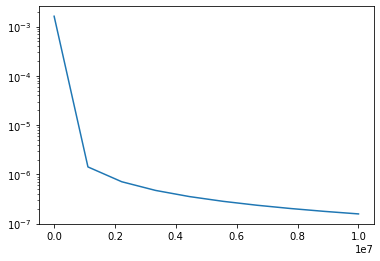

In [12]:
import matplotlib.pyplot as plt

plt.plot(steps,ris)
plt.yscale('log')
